# Hypothesis Testing Case Study


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

## Objectives 

By the end of today you should be able to,

- Given a data set come up with scientific questions that could be answered with your data 
- Answer that same question by performing a hypothesis test 


## Big Picture: Capstone 1  

Week 4, you will start your first capstone project.  This will give you the opportunity to apply the skills learned over the past three weeks to a real world problem.  

In today's case study you will gain experience performing statistical tests that will allow you to answer scientific questions. 

### Capstone 1 Work Flow

![](../../../pandas/Juliana/EDA/capstone_workflow.png)


## Side note: Capstone Proposals are due Tuesday morning of next week! 

In this proposal, you should include **3 ideas for projects**.  Each project description should include: 

- a high level over of the purpose of your capstone project
- what scientific question you would like to answer with that data
- where you plan to get your data from; we suggest you get this data from on of the following:
     - by scraping a webpage 
     - by using an API
     - downloading a data set that is multiple files that you would need to merge
     - avoid kaggle! 
     
**You should propose 3 ideas in your proposal** 


#### An example of data you may scrap: 
- Website to scrap: https://www.pro-football-reference.com/years/2019/index.htm
- Another website to scrap: https://austin.craigslist.org/d/bicycles/search/bia
- API: https://www.reddit.com/dev/api

# Example Statistical Test: Cars Data Set

Let's continue where we left off with the cars data set.  Below I import and clean the data as we did in the EDA notebook. 

## Load and Clean Data 

In [2]:
cars = pd.read_csv('../../../pandas/Juliana/EDA/data/cars_multivariate.csv', na_values=['?'])
cars = cars[cars.horsepower.notnull()]
print(cars.shape)
cars.head()

(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Possible Scientific Questions? 

Given this data set what are some scientific questions we could answer?  

<br>

<ol>
    <li>
    <li>
    <li>
    <li>

        
</ol>

<br><br><br><br><br><br><br>

## Establishing the Details of your Hypothesis Testing 

<ol>
<br><br>
<li> <details>
    <summary> <b>Scientific Question </b></summary>
    Are the the mean miles per gallon of vehicles with 4, 6, and 8 cylinders the same?
</details>
<br><br>
<li> <details>
    <summary> <b>Null Hypothesis </b></summary>
    The mean miles per gallon of vehicles with 4, 6, and 8 cylinders are the same.
</details>
<br><br>
<li><details>
    <summary> <b>Alternative Hypothesis </b></summary>
    The mean miles per gallon of vehicles with 4, 6, and 8 cylinders are not the same.
</details>
<br><br>
<li><details>
    <summary> <b>Type of Test and Test Statistic </b></summary>
    <ol>
    <li>I would like to use a Welch's t-test.  What additional information do I need to get in my EDA to make sure that this is appropriate?
    <li>In order to perform a Welch's t-test I will need the mean and standard deviation of my two populations.  Or just use scipy's function ttest_ind 
    </ol>
</details>
<br><br>
<li> <details>
    <summary> <b>What is the distribution under the null hypothesis?  </b></summary>
    The distribution of the null hypothesis represents the difference between the mean of the two distributions. So, if we are comparing the mpg for 4 and 6 cylinder vehicles, it is the distribution of the difference of samples means where the assumption is that the mean of this distribution is zero.: $$\mu_{4 cylinder} - \mu_{6 cylinder} = 0$$
</details>
<br><br>
<li> <details>
    <summary> <b>Significance level </b></summary>
    I will select a standard significance level of 0.05.  I will also use a bonferonni correction to account for the fact that I will be comparing multiple means.  
</details>

<br><br>
<li> <details>
    <summary> <b>Collect your Data, Compute p-value, Decide whether to reject the null hypothesis, State Conclusion </b></summary>
   For the final steps we will have to do some work!  We will start with EDA, then perform the calculations for the statistical test. 
</details>

</ol>

## EDA 

Let's start by actually computing the average MPG for cars with different number of cylinders

Text(0, 0.5, 'average mpg')

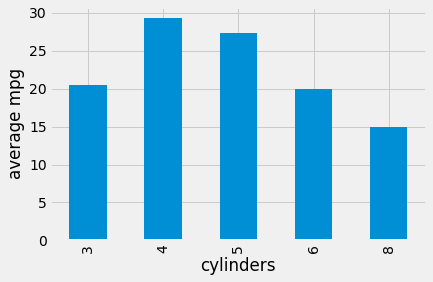

In [3]:
agg = cars.groupby('cylinders')['mpg'].mean()
agg.plot(kind='bar').set_ylabel('average mpg')

Ok, it looks like we have data for 3 and 5 cylinders.  We could potentially add this to our statistical test. 

It is important to know the sample size we have when performing a statistical test.  This may impact the actual test we perform. 

In [4]:
agg = cars.groupby('cylinders')['mpg'].count()
agg

cylinders
3      4
4    199
5      3
6     83
8    103
Name: mpg, dtype: int64

Text(0, 0.5, 'Frequency')

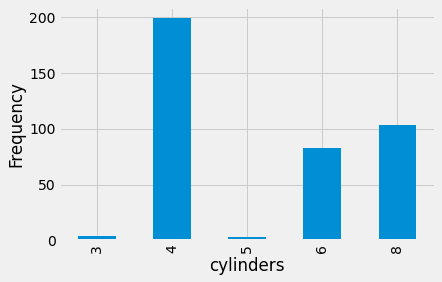

In [5]:
agg.plot(kind='bar').set_ylabel('Frequency')

A few observations:

1. We have very low sample sizes for 3 and 5 cylinders, so it makes sense to leave this out of our statisitical test.
2. We have samples sizes >30. This indicates that we can safely use the Welch's t-test.  

Let's clean up an EDA plot with our counts for the presentation

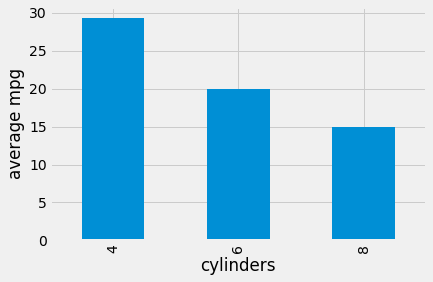

In [6]:
agg = cars[(cars['cylinders'] != 3 ) & (cars['cylinders'] != 5)].groupby('cylinders')['mpg'].mean()
agg.plot(kind='bar').set_ylabel('average mpg');

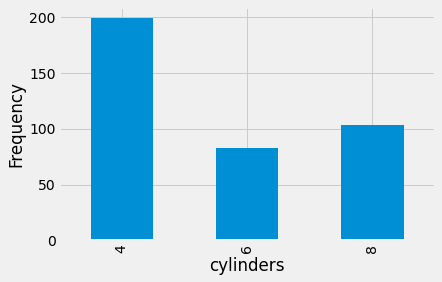

In [7]:
agg = cars[(cars['cylinders'] != 3 ) & (cars['cylinders'] != 5)].groupby('cylinders')['mpg'].count()
agg.plot(kind='bar').set_ylabel('Frequency');

One EDA plot which I think is always beneficial is to check out a histograms of the distributions of your different classes. A few things to note about the figure below:

1. Histograms are normalized! 
2. Histograms have opacity so that we can see all histograms even when they are overlapping.  

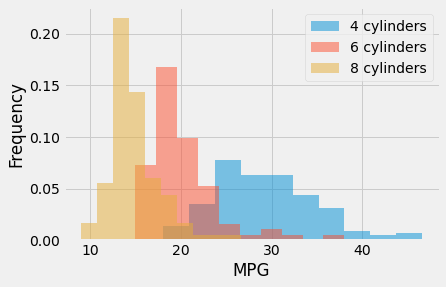

In [8]:
fig,ax = plt.subplots()
ax.hist( cars[cars['cylinders'] == 4]['mpg'] , density = True, alpha = 0.5, label= '4 cylinders')
ax.hist( cars[cars['cylinders'] == 6]['mpg'] , density = True, alpha = 0.5, label= '6 cylinders')
ax.hist( cars[cars['cylinders'] == 8]['mpg'] , density = True, alpha = 0.5, label= '8 cylinders')
ax.set_ylabel('Frequency')
ax.set_xlabel('MPG')
ax.legend();

## Collect Data and Compute P-value

Ok, we are ready to compute our p-values! I will compute three:

1. 4 v 8 cylinders
2. 4 v 6 cylinders
3. 6 v 8 cylinders

To compute these p-values I will take advantage of some built in functionality in the scipy stat's model

In [9]:
stats.ttest_ind( cars[cars['cylinders'] == 4]['mpg'], cars[cars['cylinders'] == 8]['mpg'] , equal_var= False )

Ttest_indResult(statistic=29.25141465260915, pvalue=8.086398869531912e-90)

In [10]:
stats.ttest_ind( cars[cars['cylinders'] == 4]['mpg'], cars[cars['cylinders'] == 6]['mpg'] , equal_var= False )

Ttest_indResult(statistic=16.009512599181818, pvalue=6.244862257643604e-39)

In [11]:
stats.ttest_ind( cars[cars['cylinders'] == 6]['mpg'], cars[cars['cylinders'] == 8]['mpg'] , equal_var= False )

Ttest_indResult(statistic=9.927383318132753, pvalue=4.2085386320592715e-18)

## Determine Conclusion 

Ok, now that we have a p-value we need to compare it to our significance level. Since I am performing multiple hypothesis test, I will include a Bonferroni correction.  There for my signficance for each individual test will be $\alpha = 0.05 / 3$

In [12]:
0.05/3

0.016666666666666666

All p-values are less than my significance level. There for my conclusion is:

> **I reject the null hypothesis that the mean mpg of 4, 6 and 8 cylinder vehicles are the same.**

# Hypothesis Testing Case Study 

This case study in an extension of the [EDA-Case Study](https://github.com/GalvanizeDataScience/pandas-eda-case-study) from last week. In this case study you will ask scientific questions that can be answered given a data set, and answer these questions by performing a statistical test.  If you do not wish to use the data set from your case study you may use one of the datasets within Scikit-Learn, the [California Housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing) dataset.  Information about accessing these datasets can be found [here](using_sklearn_datasets.md). 

The goals of this case study are: 
- Given data, create scientific questions that can be answered with your dataset.
- Gain experience applying appropriate statistical tests to match your scientific question and data.
- Gain experience performing statistical tests. 
- Practice explaining statistical concepts in group presentation

## Data Sets

Please visit the [EDA-Case Study](https://github.com/GalvanizeDataScience/pandas-eda-case-study) you started last week to review how to obtain the datasets for this case study.  Below is a summary of the datasets you had to choose from. We suggest you continue with datasets you started with in the EDA case study.  

- **Trending YouTube Video Statistics:** YouTube (the video sharing website) maintains a list of the top-trending videos on its platform. This dataset includes several months of data on up to 200 daily trending YouTube videos from the US, Great Britain, Germany, Canada, France, and other countries. Each region’s data is in a separate file. Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.
- **Explore Transit Lines All Over the World:** This historical and international dataset documents how transit lines have evolved all over the world. Besides time, number of lines, and line length, the dataset contains spatial locations that could be mapped using a geospatial library in Python like GeoPandas or Folium.
- **Health Nutrition and Population Statistic:** Compiled by the World Bank, this dataset includes 345 indicators, such as immunization rates, malnutrition prevalence, and vitamin A supplementation rates across 263 countries around the world. Data was collected on a yearly basis from 1960-2016.

## Deliverables

This afternoon your group will present your results of you statistical test to the class from a README in your Github repository. Your README markdown file should:

- Include EDA associated with your hypothesis test as well as information on how you choose to treat missing values and outliers in your dataset.
- Clearly state the details of the hypothesis test(s) your group performed:
        - What scientific question(s) did you answer?
        - What was your null and alternative hypothesis?
        - Were statistical test did you choose and why? What's the distribution under the null hypothesis? 
        - What's your significance level? 
        - What's your p-value?
        - Based on your results, what are the conclusions of your hypothesis test? 

For your presentation, be prepared to answer questions about your statistical test(s) and the theory behind it.